In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import scipy.stats as stats

In [3]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "CountyPovertyRate.csv"
county_pov_df = pd.read_csv(csv_path)

county_pov_df.head()

,Rank,County,Poverty Rate,Urban/Rural/Sub
0,1st,Carver County,4.00%,Suburban
1,2nd,Washington County,5.00%,Suburban
2,3rd,Wright County,5.00%,Suburban
3,4th,Chisago County,5.40%,Rural
4,5th,Scott County,5.60%,Suburban


In [4]:
county_pov_df["Poverty Rate"]

0      4.00%
1      5.00%
2      5.00%
3      5.40%
4      5.60%
       ...  
82    17.10%
83    17.90%
84    18.10%
85    19.00%
86    22.70%
Name: Poverty Rate, Length: 87, dtype: object

In [5]:
pov_rate = []
county = []
for i in range(len(county_pov_df)):
    county_pov_int = county_pov_df["Poverty Rate"][i]
    county_str = county_pov_df["County"][i]
    county_pov_int = county_pov_int.split("%")[0]
    county_str = county_str.split(" County")[0]
    pov_rate.append(county_pov_int)
    county.append(county_str)

In [6]:
county_pov_df = county_pov_df.drop(columns=["Poverty Rate"],axis=1)

In [7]:
county_pov_df = county_pov_df.drop(columns=["County"],axis=1)

In [9]:
county_pov_df["Poverty Rate (%)"] = pov_rate
county_pov_df["County"] = county
county_pov_df.head(2)

,Rank,Urban/Rural/Sub,Poverty Rate (%),County
0,1st,Suburban,4.00,Carver
1,2nd,Suburban,5.00,Washington


In [10]:
#re-order columns
county_pov_df = county_pov_df[['Rank','County','Poverty Rate (%)','Urban/Rural/Sub']]
county_pov_df.head()

,Rank,County,Poverty Rate (%),Urban/Rural/Sub
0,1st,Carver,4.00,Suburban
1,2nd,Washington,5.00,Suburban
2,3rd,Wright,5.00,Suburban
3,4th,Chisago,5.40,Rural
4,5th,Scott,5.60,Suburban


In [11]:
county_pov_df.dtypes 

Rank                object
County              object
Poverty Rate (%)    object
Urban/Rural/Sub     object
dtype: object

In [12]:
county_pov_df["Poverty Rate (%)"] = pd.to_numeric(county_pov_df["Poverty Rate (%)"])
county_pov_df.dtypes 

Rank                 object
County               object
Poverty Rate (%)    float64
Urban/Rural/Sub      object
dtype: object

In [13]:
type(county_pov_df["County"][0])

str

In [14]:
#arsenic 
csv_path1 = "arsenic_2017.csv"
arsenic_df = pd.read_csv(csv_path1)

arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips,Unnamed: 11
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,2165.0,27001.0,NaN
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45.0,27001.0,NaN
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,5.29 ug/L,6.02 ug/L,25.0,27001.0,NaN
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.77 ug/L,4.77 ug/L,633.0,27001.0,NaN
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394.0,27001.0,NaN


In [15]:
arsenic_df = arsenic_df.drop(columns=["Unnamed: 11"],axis=1)

In [16]:
arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,2165.0,27001.0
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45.0,27001.0
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,5.29 ug/L,6.02 ug/L,25.0,27001.0
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.77 ug/L,4.77 ug/L,633.0,27001.0
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394.0,27001.0


In [17]:
#check for missing info
arsenic_df.count()

pwsId               972
year                962
analyteCode         962
pwsName             962
countyServed        962
cityServed          962
waterSource         962
mean                962
max                 962
populationServed    962
fips                962
dtype: int64

In [18]:
#checks for null/missing data
null_data = arsenic_df[arsenic_df.isnull().any(axis=1)]
null_data

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
962,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,Minnesota Public Health Data Access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,Minnesota Environmental Public Health Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,Minnesota Department of Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,P.O. Box 64882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,"St. Paul, MN 55164-0882",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,Phone: (651) 201-5900 or toll free: 1-800-205-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,Fax: (651) 201-5926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970,E-mail: tracking.health@state.mn.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971,Web: http://health.mn.gov/mndata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#drop missing data
arsenic_df = arsenic_df.dropna(how='any')
arsenic_df.count()

pwsId               962
year                962
analyteCode         962
pwsName             962
countyServed        962
cityServed          962
waterSource         962
mean                962
max                 962
populationServed    962
fips                962
dtype: int64

In [20]:
arsenic_df.dtypes 

pwsId                object
year                float64
analyteCode          object
pwsName              object
countyServed         object
cityServed           object
waterSource          object
mean                 object
max                  object
populationServed    float64
fips                float64
dtype: object

In [21]:
arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,2165.0,27001.0
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45.0,27001.0
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,5.29 ug/L,6.02 ug/L,25.0,27001.0
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.77 ug/L,4.77 ug/L,633.0,27001.0
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394.0,27001.0


In [22]:
mean_col = []
max_col = []

for i in range(len(arsenic_df)):
    mean_int = arsenic_df["mean"][i]
    max_int = arsenic_df["max"][i]
    
    mean_int = mean_int.split(" ")[0]
    max_int = max_int.split(" ")[0]
    
    mean_col.append(mean_int)
    max_col.append(max_int)

In [23]:
arsenic_df["Mean (ug/L)"] = mean_col
arsenic_df["Max (ug/L)"] = max_col

arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips,Mean (ug/L),Max (ug/L)
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,2165.0,27001.0,3.09,3.22
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45.0,27001.0,0.5,0.5
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,5.29 ug/L,6.02 ug/L,25.0,27001.0,5.29,6.02
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.77 ug/L,4.77 ug/L,633.0,27001.0,4.77,4.77
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394.0,27001.0,4.83,4.83


In [24]:
arsenic_df = arsenic_df.drop(columns=["mean"],axis=1)

In [25]:
arsenic_df = arsenic_df.drop(columns=["max"],axis=1)

In [26]:
arsenic_df["populationServed"] = arsenic_df["populationServed"].astype(int)

In [27]:
arsenic_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,populationServed,fips,Mean (ug/L),Max (ug/L)
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,2165,27001.0,3.09,3.22
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,45,27001.0,0.5,0.5
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,25,27001.0,5.29,6.02
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,633,27001.0,4.77,4.77
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,394,27001.0,4.83,4.83


In [28]:
#rename columns:
arsenic_df = arsenic_df.rename(columns = {"pwsId":"ID", "pwsName":"Power System", "year":"Year",
                                "analyteCode":"Analyte","countyServed": "County",
                                "cityServed": "City Served","waterSource": "Water Source",
                                "populationServed": "Population Served","fips": "FIPS"})
arsenic_df.head()

,ID,Year,Analyte,Power System,County,City Served,Water Source,Population Served,FIPS,Mean (ug/L),Max (ug/L)
0,1010001,2017.0,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,2165,27001.0,3.09,3.22
1,1010002,2017.0,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,45,27001.0,0.5,0.5
2,1010019,2017.0,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,25,27001.0,5.29,6.02
3,1010011,2017.0,Arsenic,Hill City,Aitkin,Hill City,Groundwater,633,27001.0,4.77,4.77
4,1010016,2017.0,Arsenic,McGregor,Aitkin,McGregor,Groundwater,394,27001.0,4.83,4.83


In [29]:
arsenic_df["Year"].unique()

array([2017.])

In [30]:
#converts to int
arsenic_df["Year"] = arsenic_df["Year"].astype(int)
#converts to str
arsenic_df["Year"] = arsenic_df["Year"].astype(str)
arsenic_df.dtypes

ID                    object
Year                  object
Analyte               object
Power System          object
County                object
City Served           object
Water Source          object
Population Served      int32
FIPS                 float64
Mean (ug/L)           object
Max (ug/L)            object
dtype: object

In [31]:
arsenic_df.head()

,ID,Year,Analyte,Power System,County,City Served,Water Source,Population Served,FIPS,Mean (ug/L),Max (ug/L)
0,1010001,2017,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,2165,27001.0,3.09,3.22
1,1010002,2017,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,45,27001.0,0.5,0.5
2,1010019,2017,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,25,27001.0,5.29,6.02
3,1010011,2017,Arsenic,Hill City,Aitkin,Hill City,Groundwater,633,27001.0,4.77,4.77
4,1010016,2017,Arsenic,McGregor,Aitkin,McGregor,Groundwater,394,27001.0,4.83,4.83


In [32]:
arsenic_df["Mean (ug/L)"] = pd.to_numeric(arsenic_df["Mean (ug/L)"])
arsenic_df["Max (ug/L)"] = pd.to_numeric(arsenic_df["Max (ug/L)"])
arsenic_df.dtypes

ID                    object
Year                  object
Analyte               object
Power System          object
County                object
City Served           object
Water Source          object
Population Served      int32
FIPS                 float64
Mean (ug/L)          float64
Max (ug/L)           float64
dtype: object

In [33]:
arsenic_df = arsenic_df[['Year','ID','Power System','Water Source','County',
                         'City Served','Population Served','Analyte','Mean (ug/L)','Max (ug/L)','FIPS']]
arsenic_df.head()

,Year,ID,Power System,Water Source,County,City Served,Population Served,Analyte,Mean (ug/L),Max (ug/L),FIPS
0,2017,1010001,Aitkin,Groundwater,Aitkin,Aitkin,2165,Arsenic,3.09,3.22,27001.0
1,2017,1010002,Thompson Mobile Home Park,Groundwater,Aitkin,Aitkin,45,Arsenic,0.50,0.50,27001.0
2,2017,1010019,Why-Not Park,Groundwater,Aitkin,Aitkin,25,Arsenic,5.29,6.02,27001.0
3,2017,1010011,Hill City,Groundwater,Aitkin,Hill City,633,Arsenic,4.77,4.77,27001.0
4,2017,1010016,McGregor,Groundwater,Aitkin,McGregor,394,Arsenic,4.83,4.83,27001.0


In [34]:
arsenic_df.head(25)

,Year,ID,Power System,Water Source,County,City Served,Population Served,Analyte,Mean (ug/L),Max (ug/L),FIPS
0,2017,1010001,Aitkin,Groundwater,Aitkin,Aitkin,2165,Arsenic,3.09,3.22,27001.0
1,2017,1010002,Thompson Mobile Home Park,Groundwater,Aitkin,Aitkin,45,Arsenic,0.50,0.50,27001.0
2,2017,1010019,Why-Not Park,Groundwater,Aitkin,Aitkin,25,Arsenic,5.29,6.02,27001.0
3,2017,1010011,Hill City,Groundwater,Aitkin,Hill City,633,Arsenic,4.77,4.77,27001.0
4,2017,1010016,McGregor,Groundwater,Aitkin,McGregor,394,Arsenic,4.83,4.83,27001.0
5,2017,1010013,Palisade,Groundwater,Aitkin,Palisade,168,Arsenic,1.76,1.76,27001.0
6,2017,1020034,Andover,Groundwater,Anoka,Andover,19918,Arsenic,1.66,1.69,27003.0
7,2017,1020001,Anoka,Groundwater,Anoka,Anoka,17995,Arsenic,1.34,2.03,27003.0
8,2017,1020040,Bar None Ranch,Groundwater,Anoka,Anoka,60,Arsenic,4.34,4.34,27003.0
9,2017,1020005,GreyStone,Groundwater,Anoka,Bethel,560,Arsenic,0.50,0.50,27003.0


In [35]:
county_grouped = arsenic_df.groupby(["County"]) 
mean_concentration = county_grouped.mean()["Mean (ug/L)"]
#average_max_concentration = county_grouped.mean()["Max (ug/L)"]

In [36]:
ByCounty_df = pd.DataFrame(mean_concentration)
ByCounty_df = ByCounty_df.reset_index()
ByCounty_df.head(2)

,County,Mean (ug/L)
0,Aitkin,3.373333
1,Anoka,1.707419


In [37]:
county_grouped = arsenic_df.groupby(["County"]) 
tot_pop_grouped = county_grouped.sum()["Population Served"]

In [38]:
county_pop_df = pd.DataFrame(tot_pop_grouped)
county_pop_df.reset_index(inplace=True)
county_pop_df

,County,Population Served
0,Aitkin,3430
1,Anoka,264159
2,Becker,12540
3,Beltrami,15604
4,Benton,17818
...,...,...
81,Watonwan,8153
82,Wilkin,4221
83,Winona,40086
84,Wright,90318


In [39]:
tot_served = county_pop_df["Population Served"].sum()
tot_served

4406481

In [40]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2210fc03860>,
 [Text(-0.8923060742832425, 0.6432650074403463, 'Public'),
  Text(1.0545434711575896, -0.7602223802538981, 'Private')],
 [Text(-0.4867124041544958, 0.35087182224018887, '80.1%'),
  Text(0.6489498284046704, -0.4678291570793218, '19.9%')])

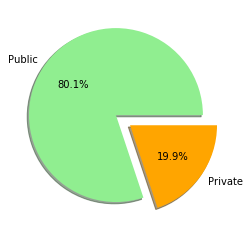

In [41]:
tot_pop = 5500000
tot_priv = tot_pop - tot_served
labels = ["Public", "Private"]
sizes = [tot_served, tot_priv]
colors=["lightgreen", "orange"]
explode=(0, .2)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

In [66]:
tot_pop_df = pd.merge(county_pop_df, county_pov_df, on="County")
tot_pop_df.head(2)

,County,Population Served,Rank,Poverty Rate (%),Urban/Rural/Sub
0,Aitkin,3430,60th,12.1,Rural
1,Anoka,264159,9th,6.6,Suburban


In [67]:
tot_pop_df = tot_pop_df.sort_values("Urban/Rural/Sub")
tot_pop_df.head(2)

,County,Population Served,Rank,Poverty Rate (%),Urban/Rural/Sub
0,Aitkin,3430,60th,12.1,Rural
59,Pope,4475,15th,7.9,Rural


In [62]:
tot_pop_grp = tot_pop_df.groupby(['Urban/Rural/Sub'])
tot_pop_grp.head()
tot_pop_grp["Population Served"].sum()

Urban/Rural/Sub
Rural       1257554
Suburban    1396779
Urban       1752148
Name: Population Served, dtype: int32

In [63]:
total_pop_df=pd.DataFrame(tot_pop_grp["Population Served"].sum())
total_pop_df

,Population Served
Urban/Rural/Sub,
Rural,1257554
Suburban,1396779
Urban,1752148


([<matplotlib.patches.Wedge at 0x22110082d30>,
 [Text(0.6867216942401912, 0.8593097896916346, 'Rural'),
  Text(-1.032318244755885, 0.3798934607809526, 'Suburban'),
  Text(0.3793082619618983, -1.138474963452181, 'Urban')],
 [Text(0.3745754695855588, 0.4687144307408916, '28.5%'),
  Text(-0.5630826789577553, 0.20721461497142865, '31.7%'),
  Text(0.2212631528111073, -0.6641103953471054, '39.8%')])

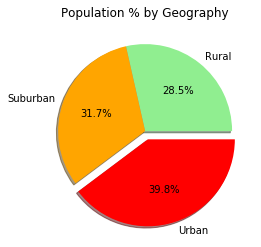

In [76]:
labels = ["Rural", "Suburban", "Urban"]
sizes = [1257554, 1396779, 1752148]
colors=["lightgreen", "orange", "red"]
explode=(0, 0, .1)
plt.title("Population % by Geography")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

([<matplotlib.patches.Wedge at 0x22110035320>,
 [Text(-1.0290585927508733, 0.38863660749547563, 'Rural (77)'),
  Text(0.9983328975174214, -0.46187815031073953, 'Suburban (8)'),
  Text(1.396350509964912, -0.10102105384884122, 'Urban (2)')],
 [Text(-0.5613046869550218, 0.21198360408844122, '88.5%'),
  Text(0.5445452168276843, -0.2519335365331306, '9.2%'),
  Text(0.8976538992631575, -0.06494210604568364, '2.3%')])

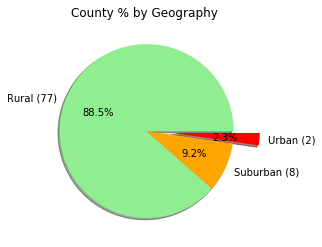

In [75]:
labels = ["Rural (77)", "Suburban (8)", "Urban (2)"]
sizes = [77, 8, 2]
colors=["lightgreen", "orange", "red"]
explode=(0, 0, .3)
plt.title("County % by Geography ")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

In [ ]:
county_combined = pd.merge(ByCounty_df,county_pov_df, on = "County", how = "inner")
county_combined.head()

In [ ]:
county_grouped = arsenic_df.groupby(["County"]) 
sd_concentration = county_grouped.std()["Mean (ug/L)"]

ByCounty1_df = pd.DataFrame(sd_concentration)
ByCounty1_df = ByCounty1_df.reset_index()
ByCounty1_df.head()


In [ ]:
ByCounty1_df = ByCounty1_df.rename(columns = {"Mean (ug/L)":"Standard Deviation (ug/L)"})

county_combined = pd.merge(ByCounty1_df,county_combined, on = "County", how = "outer")
county_combined.head()
len(county_combined)

In [ ]:
county_combined.isna().sum()

In [ ]:
bins = [0,8,10,11.55,13.4,24]
#will come back later for naming 
bin_names = ["1","2","3","4","5"]

county_combined["Bin Poverty Rate"] = pd.cut(county_combined["Poverty Rate (%)"],bins, labels = bin_names)
county_combined.head()

In [ ]:
county_combined["Bin Poverty Rate"].unique()

In [ ]:
# Create a boxplot to compare means
county_combined.boxplot("Mean (ug/L)", by="Bin Poverty Rate", figsize=(20, 10))

In [ ]:
group1 = county_combined[county_combined["Bin Poverty Rate"] == "1"]["Mean (ug/L)"]
group2 = county_combined[county_combined["Bin Poverty Rate"] == "2"]["Mean (ug/L)"]
group3 = county_combined[county_combined["Bin Poverty Rate"] == "3"]["Mean (ug/L)"]
group4 = county_combined[county_combined["Bin Poverty Rate"] == "4"]["Mean (ug/L)"]
group5 = county_combined[county_combined["Bin Poverty Rate"] == "5"]["Mean (ug/L)"]

In [ ]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

In [ ]:
rich_df = pd.DataFrame({"1":group1})
rich_df 

In [ ]:
rich_df.hist()

In [ ]:
stats.shapiro(rich_df)

In [ ]:
stats.ttest_ind(group1, group5, equal_var=False)